In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("final_dataset.csv")

In [4]:
df.head()

,Unnamed: 0,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,NaN
1,1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,NaN
2,2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0
3,3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0
4,4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0


In [7]:
# Drop unnecessary columns (like unnamed index column if present)
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

In [8]:
# checking for the null values
df.isnull().sum()

State Name                        0
Two Wheeler                       0
Three Wheeler                     0
Four Wheeler                      0
Goods Vehicles                    0
Public Service Vehicle            0
Special Category Vehicles         0
Ambulance/Hearses                 0
Construction Equipment Vehicle    0
Other                             0
Grand Total                       0
total-charging-stations           8
dtype: int64

In [10]:
# Handling missing values in 'total-charging-stations' column
#Fill missing values with the median (better for numerical distributions)
df["total-charging-stations"].fillna(df["total-charging-stations"].median(), inplace=True)

C:\Users\SAKSHI MOTE\AppData\Local\Temp\ipykernel_17424\602356388.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total-charging-stations"].fillna(df["total-charging-stations"].median(), inplace=True)


In [11]:
df.isnull().sum()

State Name                        0
Two Wheeler                       0
Three Wheeler                     0
Four Wheeler                      0
Goods Vehicles                    0
Public Service Vehicle            0
Special Category Vehicles         0
Ambulance/Hearses                 0
Construction Equipment Vehicle    0
Other                             0
Grand Total                       0
total-charging-stations           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State Name                      32 non-null     object 
 1   Two Wheeler                     32 non-null     int64  
 2   Three Wheeler                   32 non-null     float64
 3   Four Wheeler                    32 non-null     int64  
 4   Goods Vehicles                  32 non-null     float64
 5   Public Service Vehicle          32 non-null     float64
 6   Special Category Vehicles       32 non-null     float64
 7   Ambulance/Hearses               32 non-null     float64
 8   Construction Equipment Vehicle  32 non-null     float64
 9   Other                           32 non-null     float64
 10  Grand Total                     32 non-null     int64  
 11  total-charging-stations         32 non-null     float64
dtypes: float64(8), int64(3), object(1)
mem

In [13]:
# Convert relevant columns to integer type if needed (ensuring no decimals in vehicle counts)
int_columns = ["Two Wheeler", "Three Wheeler", "Four Wheeler", "Goods Vehicles", 
               "Public Service Vehicle", "Special Category Vehicles", "Ambulance/Hearses", 
               "Construction Equipment Vehicle", "Other", "Grand Total", "total-charging-stations"]
df[int_columns] = df[int_columns].astype(int)

In [15]:
# Removing potential outliers using IQR method for numeric columns
for col in int_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 27
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   State Name                      10 non-null     object
 1   Two Wheeler                     10 non-null     int32 
 2   Three Wheeler                   10 non-null     int32 
 3   Four Wheeler                    10 non-null     int32 
 4   Goods Vehicles                  10 non-null     int32 
 5   Public Service Vehicle          10 non-null     int32 
 6   Special Category Vehicles       10 non-null     int32 
 7   Ambulance/Hearses               10 non-null     int32 
 8   Construction Equipment Vehicle  10 non-null     int32 
 9   Other                           10 non-null     int32 
 10  Grand Total                     10 non-null     int32 
 11  total-charging-stations         10 non-null     int32 
dtypes: int32(11), object(1)
memory usage: 600.0+ bytes


In [18]:
df.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,Andaman and Nicobar Island,1,30,81,0,40,0,0,0,7,159,25
1,Arunachal Pradesh,14,0,5,0,0,0,0,0,1,20,25
4,Chandigarh,298,1410,182,0,40,0,0,0,1,1931,2
10,Himachal Pradesh,368,167,37,7,86,0,0,0,46,711,6
11,Jammu and Kashmir,1417,43,10,6,43,0,0,0,8,1527,7


C:\Users\SAKSHI MOTE\AppData\Local\Temp\ipykernel_17424\3467560057.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Vehicle Type", y="Count", data=df_melted, showfliers=False, palette="coolwarm")


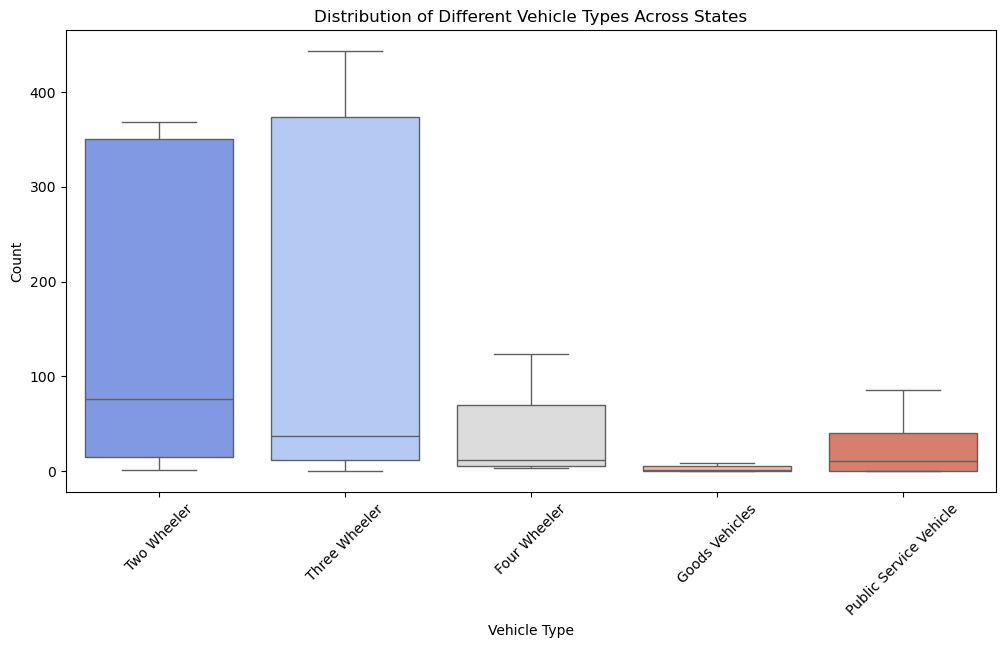

In [19]:
# 1. Distribution of Different Vehicle Types
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=["State Name"], value_vars=["Two Wheeler", "Three Wheeler", "Four Wheeler", 
                                                         "Goods Vehicles", "Public Service Vehicle"],
                    var_name="Vehicle Type", value_name="Count")
sns.boxplot(x="Vehicle Type", y="Count", data=df_melted, showfliers=False, palette="coolwarm")
plt.title("Distribution of Different Vehicle Types Across States")
plt.xticks(rotation=45)
plt.show()

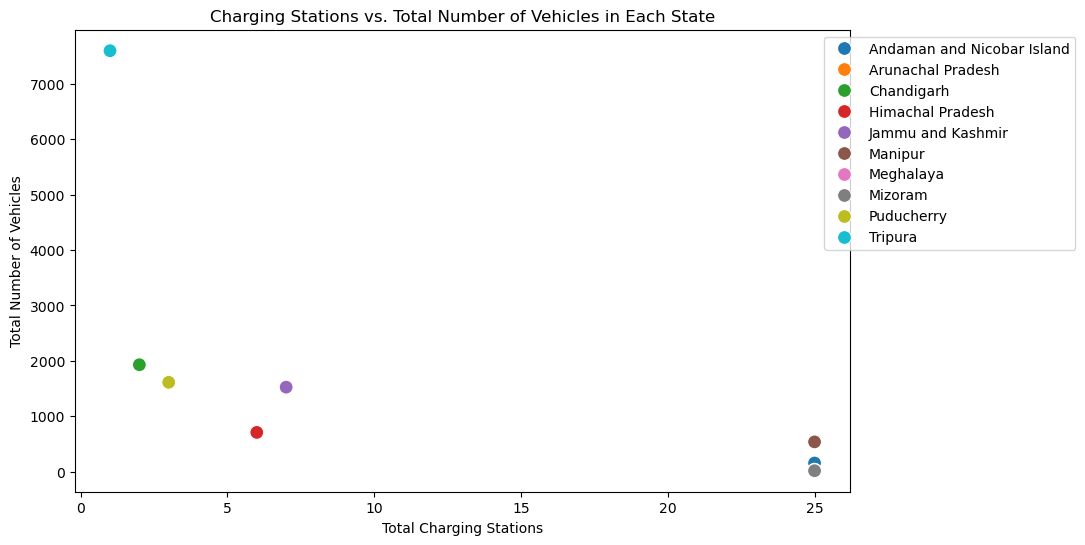

In [20]:
# 2. Charging Stations vs. Total Number of Vehicles
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="total-charging-stations", y="Grand Total", hue="State Name", palette="tab10", s=100)
plt.xlabel("Total Charging Stations")
plt.ylabel("Total Number of Vehicles")
plt.title("Charging Stations vs. Total Number of Vehicles in Each State")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.show()

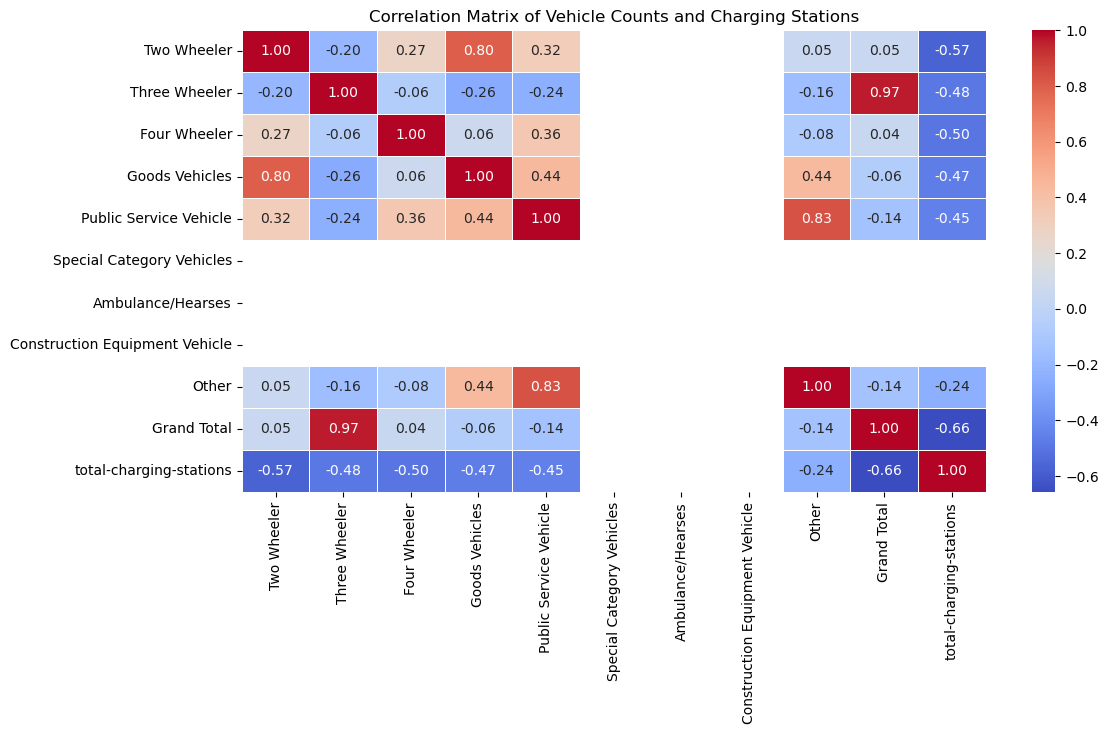

In [22]:
# 3. Correlation Heatmap
plt.figure(figsize=(12, 6))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numerical columns
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Vehicle Counts and Charging Stations")
plt.show()

C:\Users\SAKSHI MOTE\AppData\Local\Temp\ipykernel_17424\1408500421.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states["State Name"], y=top_states["Grand Total"], palette="viridis")


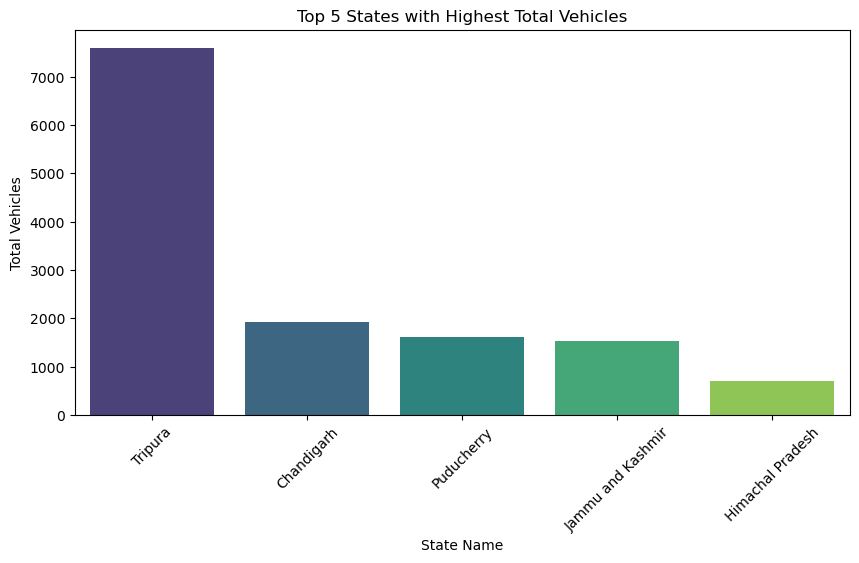

In [23]:
# 4. Top 5 States with Highest Total Vehicles
top_states = df.sort_values(by="Grand Total", ascending=False).head(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states["State Name"], y=top_states["Grand Total"], palette="viridis")
plt.xlabel("State Name")
plt.ylabel("Total Vehicles")
plt.title("Top 5 States with Highest Total Vehicles")
plt.xticks(rotation=45)
plt.show()

C:\Users\SAKSHI MOTE\AppData\Local\Temp\ipykernel_17424\4185413617.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_charging_states["State Name"], y=top_charging_states["total-charging-stations"], palette="plasma")


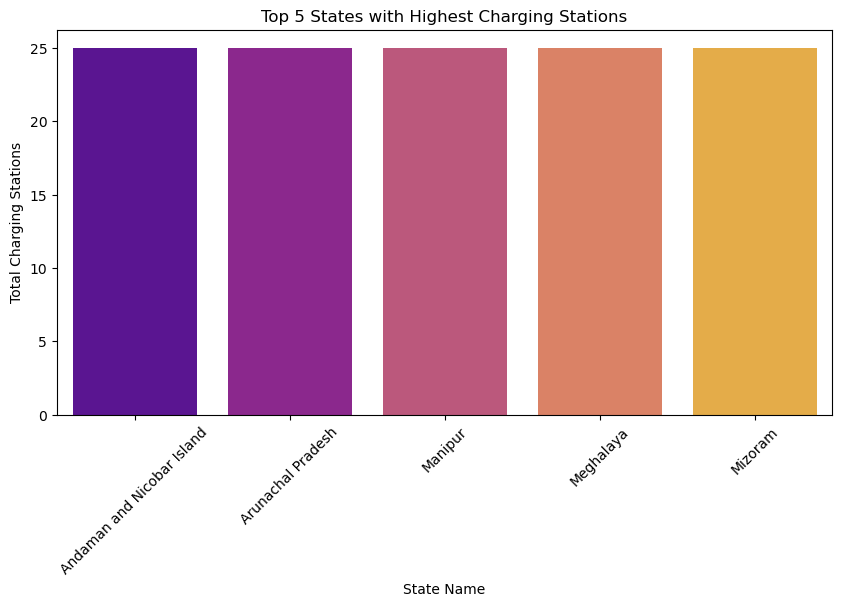

In [25]:
# Ensure the column is numeric
df["total-charging-stations"] = pd.to_numeric(df["total-charging-stations"], errors="coerce")

# Get the top 5 states
top_charging_states = df.nlargest(5, "total-charging-stations")

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_charging_states["State Name"], y=top_charging_states["total-charging-stations"], palette="plasma")
plt.xlabel("State Name")
plt.ylabel("Total Charging Stations")
plt.title("Top 5 States with Highest Charging Stations")
plt.xticks(rotation=45)
plt.show()
